In [1]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten,Conv1D,MaxPooling1D,Bidirectional
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from nltk.corpus import stopwords
import nltk
import string 
from tensorflow.keras import regularizers

C:\Users\public\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data=pd.read_excel('Book1.xlsx')
data = data.dropna()

In [30]:
data.head()
title = [['List of conflicts in the United States']]

In [4]:
stop_words=list(set(stopwords.words('english')))
punct = list(string.punctuation)
stop_words1 = stop_words + punct + ["Lists","List",'list','lists']
stop_words = stop_words + punct + ["Lists","List",'list','lists','top']  
d_best = {}
for i in range(len(data['text'])):#converting train data in lower form
    p = data['text'][i]
    d_best[p] = data['category'][i]
    p=p.split(' ')
    filter_word = [ele for ele in p if ele not in stop_words]
    p = " ".join(filter_word)
    data['text'][i]=p
    


In [5]:
data['target'] = data.category.astype('category').cat.codes
data['target'].value_counts()

18    405
15    362
2     318
17    236
13    202
6     187
11    175
19    162
0     158
12    142
8     142
4     124
7     122
9     121
10    120
16    114
5     112
14     19
3      15
1       9
Name: target, dtype: int64

In [6]:
data['category'].value_counts()

Sport            405
Music            362
Crime            318
Science          236
Law              202
Energy           187
History          175
Technology       162
Business         158
Geography        142
Languages        142
Economy          124
Entertainment    122
Government       121
Health           120
Politics         114
Education        112
Life              19
Cultural          15
Bussiness          9
Name: category, dtype: int64

In [7]:
num_class = len(np.unique(data.category.values))
y = data['target'].values


d={17:'Sport',14:'Music',1:'Crime',16:'Science',12:'Law',5:'Energy',10:'History',0:'Bussiness',18:'Tchnology',7:'Languages',11:'Geograpghy',3:'Economy',6:'Entertainment',8:'Government',9:'Health',15:'Politics',4:'Education',13:'Life',2:'Cultural'}
MAX_LENGTH = 10
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.text.values)
post_seq = tokenizer.texts_to_sequences(data.text.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05)
vocab_size = len(tokenizer.word_index) + 1
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,128,input_length=MAX_LENGTH)(inputs)


x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 128)           456576    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                660       
Total params: 508,724
Trainable params: 508,724
Non-trainable params: 0
_________________________________________________________________

Train on 2311 samples, validate on 771 samples
Epoch 1/10
2311/2311 [==============================] - 4s 2ms/step - l

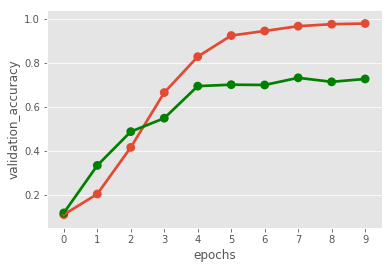

In [9]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [10]:
model.load_weights('weights.hdf5')
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)


0.7914110429447853

In [31]:
tokenizer.fit_on_texts(title)
post_seq = tokenizer.texts_to_sequences(title)
post = pad_sequences(post_seq, maxlen=10)
pred = model.predict(post)
predict = np.argmax(pred, axis=1)
p=0
if title[0][0] in d_best:
    print(d_best[title[0][0]])
    p=1
if(not p):
    print("Category: ",d[predict[0]])

Category:  History


### Tag

In [32]:
title=title[0][0].split()
filtered_sentence=[ele for ele in title if ele not in stop_words1]
tags1 = []
for i in range(len(filtered_sentence)):
    p="#"+"".join(filtered_sentence[i:i+3])
    q="#"+"".join(filtered_sentence[i:i+2])
    tags1.append(p)
    tags1.append(q)
tags1 = list(set(tags1))
for ele in tags1[::-1]:
    print(ele)


#india
#topwebsites
#websitesindia
#topwebsitesindia


In [20]:
tags2={'Academic':['#academic', '#education', '#student', '#university', '#school', '#research', '#college', '#learning', '#educators', '#art', '#class', '#science', '#academia', '#academics', '#career', '#phd', '#classes', '#students', '#tutor', '#researcher', '#phdlife', '#study', '#scholar', '#tutorial', '#studentlife', '#academiclife', '#careeropportunities', '#careergoals', '#collegelife', '#bhfyp', '#teacher', '#educationalbatch', '#parents', '#studygram', '#engineering', '#tuition', '#motivation', '#writing', '#assignment', '#drawing', '#dissertation', '#english', '#tuitions', '#teacherlife', '#academicwriting', '#educator', '#conference', '#taeg', '#testprep', '#commerce', '#australia', '#learn', '#teachersofinstagram', '#teaching', '#gbec', '#phdstudent', '#chemistry', '#history', '#medicine', '#privatetutoring'],
      'Art':['#art', '#artist', '#drawing', '#artwork', '#love', '#photography', '#painting', '#illustration', '#design', '#sketch', '#digitalart', '#artistsoninstagram', '#instagood', '#arte', '#photooftheday', '#draw', '#like', '#fashion', '#instaart', '#beautiful', '#instagram', '#contemporaryart', '#music', '#fanart', '#follow', '#nature', '#picoftheday', '#photo', '#artoftheday', '#bhfyp', '#anime', '#style', '#portrait', '#creative', '#cute', '#bhfyp', '#tattoo', '#sketchbook', '#ink', '#travel', '#life', '#paint', '#happy', '#beauty', '#architecture', '#artgallery', '#color', '#watercolor', '#arts', '#drawings', '#abstractart', '#gallery', '#streetart', '#photographer', '#artsy', '#blackandwhite', '#fineart', '#graphicdesign', '#doodle', '#graffiti'],
      'Bussiness':['#bussiness', '#entrepreneur', '#success', '#money', '#motivation', '#marketing', '#lifestyle', '#instagram', '#instagood', '#love', '#business', '#like', '#businessowner', '#negocios', '#likeforlikes', '#work', '#investment', '#quotes', '#follow', '#photography', '#startup', '#inspiration', '#bisnis', '#marketingdigital', '#entrepreneurship', '#fashion', '#venezuela', '#life', '#enterpreneur', '#bhfyp', '#design', '#n', '#luxurylifestyle', '#travel', '#bussinesswoman', '#bisnisonline', '#goals', '#businesswoman', '#mindset', '#ebiz', '#luxury', '#motivationalquotes', '#emprendedores', '#india', '#billionaire', '#art', '#photooftheday', '#a', '#online', '#digitalmarketing', '#entrepreneurlife', '#sukses', '#brand', '#nevergiveup', '#bussinessman', '#beauty', '#followforfollowback', '#k', '#bussines', '#realestate', '#entrepreneur', '#business', '#motivation', '#entrepreneurship', '#success', '#entrepreneurlife', '#smallbusiness', '#marketing', '#inspiration', '#love', '#money', '#startup', '#businessowner', '#hustle', '#goals', '#lifestyle', '#mindset', '#fashion', '#instagood', '#realestate', '#digitalmarketing', '#life', '#follow', '#girlboss', '#branding', '#businesswoman', '#entrepreneurs', '#motivationalquotes', '#leadership', '#bhfyp', '#success', '#motivation', '#entrepreneur', '#business', '#inspiration', '#love', '#goals', '#life', '#mindset', '#motivationalquotes', '#money', '#quotes', '#lifestyle', '#entrepreneurship', '#instagood', '#hustle', '#successquotes', '#leadership', '#marketing', '#happiness', '#fitness', '#wealth', '#happy', '#instagram', '#inspirationalquotes', '#believe', '#follow', '#positivevibes', '#startup', '#bhfyp', '#successmindset', '#inspire', '#quoteoftheday', '#hardwork', '#entrepreneurlife', '#successful', '#work', '#millionaire', '#like', '#businessowner', '#positivity', '#growth', '#health', '#realestate', '#luxury', '#selflove', '#investment', '#quote', '#education', '#bhfyp', '#nevergiveup', '#forex', '#smallbusiness', '#focus', '#fashion', '#passion', '#lifequotes', '#dream', '#bitcoin', '#finance'],
      'Crime':['#crime', '#truecrime', '#drama', '#thriller', '#murder', '#movie', '#film', '#mystery', '#truecrimecommunity', '#police', '#o', '#horror', '#action', '#criminal', '#podcast', '#movies', '#truecrimepodcast', '#s', '#comedy', '#cinema', '#bookstagram', '#serialkillers', '#truecrimeaddict', '#serialkiller', '#art', '#books', '#crimescene', '#love', '#news', '#justice', '#netflix', '#book', '#killer', '#death', '#mafia', '#suspense', '#truecrimejunkie', '#london', '#brasil', '#bhfyp', '#detective', '#direito', '#podcasting', '#law', '#history', '#podcastersofinstagram', '#booklover', '#podcasts', '#tv', '#crimefiction', '#forensics', '#creepy', '#murderino', '#films', '#investigation', '#series', '#violence', '#bookworm', '#direitopenal', ''],
      'Culture':['#culture', '#art', '#music', '#photography', '#travel', '#love', '#history', '#fashion', '#hiphop', '#nature', '#india', '#tradition', '#heritage', '#instagood', '#artist', '#cultura', '#dance', '#instagram', '#photooftheday', '#architecture', '#lifestyle', '#africa', '#life', '#travelphotography', '#style', '#like', '#follow', '#community', '#beautiful', '#beauty', '#design', '#food', '#traditional', '#rap', '#picoftheday', '#festival', '#explore', '#indonesia', '#photo', '#museum', '#repost', '#arte', '#adventure', '#travelgram', '#people', '#inspiration', '#family', '#s', '#photographer', '#arts', '#fun', '#japan', '#painting', '#italy', '#budaya', '#bhfyp', '#education', '#ig', '#paris'],
      'Economy': ['#economy', '#business', '#economics', '#money', '#covid', '#finance', '#coronavirus', '#india', '#stockmarket', '#news', '#politics', '#investing', '#indianeconomy', '#investment', '#usa', '#economia', '#entrepreneur', '#stocks', '#education', '#economist', '#trump', '#motivation', '#microeconomics', '#trading', '#macroeconomics', '#success', '#bitcoin', '#wealth', '#econometrics', '#marketing', '#government', '#economic', '#forex', '#upsc', '#corona', '#trade', '#follow', '#realestate', '#world', '#invest', '#commerce', '#capitalism', '#china', '#like', '#internationaleconomics', '#history', '#modi', '#pandemic', '#wallstreet', '#shipping', '#donaldtrump', '#recession', '#memes', '#school', '#entrepreneurship', '#economyclass', '#financial', '#instagram', '#netjrf'],
      'Education':['#education', '#learning', '#school', '#students', '#love', '#children', '#motivation', '#kids', '#student', '#study', '#teacher', '#college', '#learn', '#science', '#university', '#india', '#teaching', '#knowledge', '#training', '#business', '#success', '#teachersofinstagram', '#teachers', '#inspiration', '#community', '#art', '#technology', '#english', '#instagood', '#fun', '#instagram', '#covid', '#health', '#preschool', '#career', '#studyabroad', '#nonprofit', '#entrepreneur', '#family', '#life', '#schools', '#educationmatters', '#stem', '#parenting', '#educational', '#studentlife', '#music', '#repost', '#engineering', '#edtech', '#parents', '#teachersfollowteachers', '#charity', '#nature', '#travel', '#leadership', '#follow', '#kindergarten', '#goals'],
      'Energy':['#energy', '#love', '#fitness', '#health', '#healing', '#motivation', '#meditation', '#life', '#power', '#nature', '#positivevibes', '#spiritual', '#inspiration', '#selflove', '#yoga', '#healthy', '#spirituality', '#goodvibes', '#happiness', '#lifestyle', '#wellness', '#art', '#peace', '#happy', '#universe', '#music', '#soul', '#healthylifestyle', '#instagood', '#mindfulness', '#consciousness', '#vibes', '#renewableenergy', '#energyhealing', '#solar', '#selfcare', '#crystals', '#light', '#positivity', '#energia', '#workout', '#weightloss', '#follow', '#reiki', '#spiritualawakening', '#chakras', '#positive', '#smile', '#lawofattraction', '#energydrink', '#goals', '#focus', '#mindset', '#balance', '#photography', '#gym', '#fit', '#awakening', '#like'],
      'Entertainment':['#entertainment', '#music', '#fun', '#love', '#comedy', '#hiphop', '#fashion', '#party', '#dance', '#instagood', '#follow', '#events', '#art', '#news', '#instagram', '#artist', '#funny', '#media', '#livemusic', '#event', '#photography', '#actor', '#memes', '#movies', '#dj', '#like', '#nightlife', '#singer', '#entertainer', '#bollywood', '#show', '#viral', '#hollywood', '#trending', '#youtube', '#film', '#live', '#repost', '#tv', '#podcast', '#radio', '#rap', '#business', '#entrepreneur', '#actress', '#model', '#india', '#wedding', '#family', '#food', '#tiktok', '#motivation', '#movie', '#funnymemes', '#dancer', '#celebrity', '#explorepage', '#photooftheday'],
      'Geograpghy':['#geography', '#history', '#maps', '#geografia', '#map', '#nature', '#travel', '#cartography', '#upsc', '#earth', '#world', '#currentaffairs', '#photography', '#mapping', '#geology', '#landscape', '#instagram', '#art', '#education', '#science', '#europe', '#ssc', '#enem', '#naturephotography', '#geografi', '#study', '#facts', '#worldmap', '#instagood'],
      'Government':['#government', '#politics', '#india', '#covid', '#news', '#coronavirus', '#america', '#trump', '#usa', '#corona', '#love', '#vote', '#republican', '#business', '#upsc', '#maga', '#bjp', '#donaldtrump', '#congress', '#democrat', '#education', '#election', '#instagram', '#freedom', '#money', '#currentaffairs', '#gk', '#democracy', '#narendramodi', '#truth', '#liberal', '#conservative', '#elections', '#ssc', '#lockdown', '#modi', '#economy', '#political', '#follow', '#virus', '#governmentjobs', '#world', '#indian', '#stayhome', '#libertarian', '#ias', '#democrats', '#corruption', '#knowledge', '#delhi', '#newworldorder', '#illuminati', '#conspiracy', '#unitednations', '#peace', '#repost', '#people', '#meme'],
      'Health':['#health', '#fitness', '#wellness', '#healthy', '#healthylifestyle', '#motivation', '#workout', '#gym', '#love', '#fit', '#lifestyle', '#nutrition', '#training', '#fitnessmotivation', '#weightloss', '#exercise', '#healthyfood', '#fitfam', '#bodybuilding', '#covid', '#beauty', '#life', '#healthyliving', '#food', '#instagood', '#diet', '#healthcare', '#selfcare', '#yoga', '#coronavirus', '#fitspo', '#gymlife', '#personaltrainer', '#mentalhealth', '#goals', '#strong', '#muscle', '#sport', '#medicine', '#strength', '#inspiration', '#healing', '#organic', '#natural', '#cardio', '#wellbeing', '#happy', '#happiness', '#bhfyp', '#medical', '#crossfit', '#skincare', '#selflove', '#doctor', '#instafit', '#healthyeating', '#healthylife', '#follow', '#family'],
      'History':['#history', '#travel', '#ww', '#photography', '#art', '#architecture', '#culture', '#love', '#photooftheday', '#museum', '#heritage', '#s', '#nature', '#travelphotography', '#historia', '#instagood', '#historical', '#italy', '#worldwar', '#memes', '#war', '#instagram', '#ig', '#picoftheday', '#vintage', '#photo', '#europe', '#india', '#beautiful', '#historymemes', '#explore', '#travelgram', '#germany', '#medieval', '#a', '#ancient', '#follow', '#military', '#historic', '#france', '#usa', '#italia', '#bhfyp', '#wwii', '#adventure', '#old', '#like', '#archaeology', '#city', '#life', '#castle', '#tourism', '#storia', '#landscape', '#world', '#instatravel', '#church'],
      'Language':['#language', '#english', '#languagelearning', '#learning', '#vocabulary', '#learn', '#languages', '#learnenglish', '#education', '#grammar', '#words', '#culture', '#study', '#englishlanguage', '#wordoftheday', '#love', '#s', '#linguistics', '#ielts', '#englishteacher', '#polyglot', '#learningenglish', '#languagestudy', '#esl', '#spanish', '#french', '#art', '#teacher', '#toefl', '#languagelover', '#languageschool', '#german', '#travel', '#englishvocabulary', '#englishgrammar', '#ingles', '#studyenglish', '#school', '#foreignlanguage', '#japanese', '#arabic', '#hsk', '#learninglanguages', '#t', '#translation', '#idiomas', '#englishtips', '#word', '#n', '#chinese', '#studygram', '#instagood', '#speech', '#poetry', '#englishlearning', '#communication', '#instagram', '#idioms', '#writing'],
      'Law':['#law', '#lawyer', '#legal', '#lawyers', '#attorney', '#lawschool', '#lawfirm', '#lawstudent', '#lawyerlife', '#justice', '#direito', '#lawyersofinstagram', '#personalinjury', '#advocate', '#court', '#business', '#clat', '#lawstudents', '#supremecourt', '#hukuk', '#abogados', '#studygram', '#lawyering', '#a', '#attorneys', '#derecho', '#study', '#advogada', '#jura', '#litigation', '#advogado', '#avvocato', '#onepiece', '#indianlaw', '#advocacia', '#india', '#lawlife', '#attorneyatlaw', '#oab', '#familylaw', '#businesslaw', '#motivation', '#avukat', '#legalnews', '#abogado', '#o', '#university', '#direitoporamor', '#l', '#instalawyer', '#follow', '#lawyerstyle', '#judiciary', '#legaladvice', '#lawstudentlife', '#news'],
      'Life':['#life', '#love', '#like', '#instagood', '#follow', '#lifestyle', '#instagram', '#happy', '#photography', '#photooftheday', '#smile', '#nature', '#art', '#motivation', '#me', '#beautiful', '#style', '#travel', '#picoftheday', '#fun', '#photo', '#instadaily', '#music', '#followme', '#quotes', '#fashion', '#l', '#inspiration', '#live', '#cute', '#likeforlikes', '#selfie', '#family', '#myself', '#happiness', '#fitness', '#beauty', '#bhfyp', '#instalike', '#girl', '#instamood', '#peace', '#likes', '#igers', '#success', '#amazing', '#model', '#health', '#mylife', '#lifequotes', '#goals', '#followforfollowback', '#world', '#believe', '#pic'],
      'Music':['#music', '#love', '#hiphop', '#rap', '#musician', '#art', '#singer', '#musica', '#dj', '#artist', '#rock', '#dance', '#instagood', '#like', '#guitar', '#follow', '#instagram', '#song', '#party', '#livemusic', '#live', '#s', '#concert', '#photography', '#newmusic', '#producer', '#instamusic', '#band', '#musicvideo', '#video', '#fashion', '#rapper', '#trap', '#pop', '#beats', '#bhfyp', '#youtube', '#m', '#fun', '#cover', '#spotify', '#repost', '#metal', '#photooftheday', '#musically', '#happy', '#bass', '#musicians', '#piano', '#likeforlikes', '#musicproducer', '#songwriter', '#explorepage', '#radio', '#friends', '#songs', '#a', '#soundcloud', '#picoftheday'],
      'Nature':['#nature', '#naturephotography', '#photography', '#travel', '#love', '#photooftheday', '#landscape', '#instagood', '#naturelovers', '#beautiful', '#picoftheday', '#ig', '#photo', '#sunset', '#instagram', '#art', '#wildlife', '#travelphotography', '#sky', '#like', '#mountains', '#flowers', '#adventure', '#naturelover', '#winter', '#follow', '#life', '#birds', '#hiking', '#landscapephotography', '#beauty', '#outdoors', '#explore', '#bhfyp', '#forest', '#green', '#summer', '#animals', '#wanderlust', '#sun', '#canon', '#beach', '#macro', '#happy', '#travelgram', '#trees', '#spring', '#sea', '#tree', '#natur', '#wildlifephotography', '#clouds', '#india', '#instadaily', '#naturaleza', '#snow', '#a', '#cute', '#amazing'],
      'People':['#people', '#love', '#photography', '#life', '#portrait', '#instagram', '#instagood', '#art', '#photooftheday', '#travel', '#streetphotography', '#like', '#nature', '#music', '#world', '#street', '#fashion', '#beautiful', '#follow', '#india', '#photo', '#happy', '#bnw', '#lifestyle', '#style', '#friends', '#blackandwhite', '#fun', '#picoftheday', '#city', '#smile', '#photographer', '#girl', '#motivation', '#me', '#quotes', '#family', '#travelphotography', '#yourself', '#model', '#canon', '#live', '#party', '#portraitphotography', '#architecture', '#peace', '#beauty', '#business', '#instadaily', '#culture', '#food', '#a', '#work', '#insta', '#artist', '#likeforlikes', '#mood', '#happiness'],
      'Philosophy':['#philosophy', '#art', '#life', '#quotes', '#love', '#wisdom', '#psychology', '#philosopher', '#inspiration', '#poetry', '#motivation', '#spirituality', '#photography', '#truth', '#meditation', '#mindfulness', '#philosophyquotes', '#thoughts', '#quoteoftheday', '#artist', '#nature', '#quote', '#writer', '#consciousness', '#books', '#filosofia', '#knowledge', '#mindset', '#stoicism', '#philosophical', '#philosophymemes', '#lifestyle', '#writersofinstagram', '#literature', '#science', '#culture', '#buddha', '#health', '#quotestoliveby', '#bhfyp', '#stoic', '#mind', '#peace', '#inspirationalquotes', '#yoga', '#history', '#wordsofwisdom', '#thinking', '#instagram', '#existentialism', '#success', '#freedom', '#happiness', '#god', '#music', '#zen', '#think', '#lifequotes', '#philosophie'],
      'Politics':['#politics', '#trump', '#news', '#india', '#election', '#usa', '#republican', '#conservative', '#maga', '#memes', '#america', '#vote', '#donaldtrump', '#bjp', '#congress', '#democrat', '#democrats', '#politicalmemes', '#liberal', '#meme', '#political', '#government', '#love', '#narendramodi', '#berniesanders', '#freedom', '#art', '#bernie', '#politik', '', '#covid', '#coronavirus', '#modi', '#democracy', '#elections', '#indianpolitics', '#history', '#libertarian', '#amitshah', '#instagram', '#rahulgandhi', '#delhi', '#funny', '#socialism', '#president', '#politica', '#follow', '#media', '#instagood', '#indian', '#makeamericagreatagain', '#a', '#maharashtra', '#gop', '#business', '#republicans', '#corona', '#photography', '#communism', '#dankmemes'],
      'Religion':['#religion', '#god', '#islam', '#faith', '#love', '#jesus', '#church', '#muslim', '#pray', '#allah', '#spirituality', '#peace', '#spiritual', '#quran', '#christianity', '#life', '#india', '#bible', '#prayer', '#christian', '#art', '#believe', '#hope', '#meditation', '#travel', '#grace', '#amen', '#jesuschrist', '#prayers', '#soul', '#instagram', '#instagood', '#hindu', '#atheist', '#islamic', '#quotes', '#sunnah', '#trust', '#catholic', '#mind', '#religious', '#atheism', '#praying', '#culture', '#forgiveness', '#faithful', '#compassion', '#architecture', '#history', '#calm', '#destiny', '#knowledge', '#a', '#islamicquotes', '#guidance', '#christ', '#hinduism'],
      'Science':['#science', '#biology', '#technology', '#chemistry', '#physics', '#research', '#art', '#space', '#nature', '#engineering', '#education', '#scientist', '#nasa', '#stem', '#astronomy', '#facts', '#universe', '#medicine', '#love', '#health', '#memes', '#math', '#knowledge', '#sciencememes', '#life', '#earth', '#laboratory', '#tech', '#maths', '#instagood', '#instagram', '#ciencia', '#bhfyp', '#cosmos', '#medical', '#india', '#photography', '#covid', '#study', '#learning', '#school', '#innovation', '#mathematics', '#microbiology', '#astrophysics', '#scicomm', '#repost', '#follow', '#student', '#meme', '#history', '#motivation', '#like', '#galaxy', '#sciencefacts', '#coronavirus', '#design', '#spacex', '#fun'],
      'Society':['#society', '#love', '#life', '#art', '#bhfyp', '#futebol', '#photography', '#cannabiscommunity', '#cannabis', '#culture', '#people', '#artist', '#follow', '#quotes', '#instagram', '#weed', '#community', '#memes', '#dabs', '#weedporn', '#thc', '#instagood', '#like', '#cbd', '#social', '#music', '#india', '#dab', '#world', ''],
      'Sports':['#sports', '#sport', '#football', '#fitness', '#basketball', '#nfl', '#nba', '#training', '#soccer', '#gym', '#workout', '#motivation', '#athlete', '#baseball', '#follow', '#love', '#instagood', '#fun', '#sportsphotography', '#fit', '#mlb', '#photography', '#running', '#instagram', '#like', '#hockey', '#health', '#nike', '#fashion', '#life', '#fitnessmotivation', '#espn', '#boxing', '#cricket', '#lifestyle', '#nhl', '#news', '#ball', '#photooftheday', '#mma', '#f', '#game', '#tennis', '#india', '#sportswear', '#k', '#futbol', '#bhfyp', '#ballislife', '#ncaa', '#rugby', '#bodybuilding', '#art', '#collegefootball', '#run', '#athletes', '#healthy', '#style', '#travel'],
      'Techonology':['#technology', '#tech', '#innovation', '#engineering', '#business', '#iphone', '#science', '#design', '#electronics', '#apple', '#gadgets', '#technews', '#smartphone', '#instagood', '#android', '#software', '#programming', '#instatech', '#samsung', '#computer', '#security', '#pro', '#gadget', '#coding', '#education', '#bhfyp', '#startup', '#future', '#techie', '#bhfyp', '#ai', '#cybersecurity', '#art', '#iot', '#marketing', '#artificialintelligence', '#mobile', '#it', '#engineer', '#tecnologia', '#robotics', '#d', '#instagram', '#india', '#techno', '#follow', '#technologynews', '#photooftheday', '#automation', '#geek', '#internet', '#s', '#entrepreneur', '#g', '#love', '#computerscience', '#oneplus', '#google', '#like', '#news'],
      'Universe':['#universe', '#love', '#space', '#art', '#astronomy', '#nature', '#cosmos', '#science', '#galaxy', '#energy', '#stars', '#life', '#nasa', '#meditation', '#spirituality', '#earth', '#moon', '#spiritual', '#peace', '#photography', '#lawofattraction', '#soul', '#astrophotography', '#consciousness', '#selflove', '#spiritualawakening', '#healing', '#inspiration', '#awakening', '#bhfyp', '#world', '#physics', '#happiness', '#astrophysics', '#motivation', '#gratitude', '#god', '#mindfulness', '#artist', '#positivevibes', '#wisdom', '#planets', '#pentagon', '#milkyway', '#believe', '#enlightenment', '#faith', '#goodvibes', '#light', '#quotes', '#instagood', '#spirit', '#magic', '#lightworker', '#solarsystem', '#instagram', '#thirdeye', '#yoga', '#cosmology', '#nightsky']}

In [35]:
def print_tag(ta):
    count=0
    while count<10:
        print(ta[count])
        count+=1
tag=tags2["History"]
print_tag(tag)


#history
#travel
#ww
#photography
#art
#architecture
#culture
#love
#photooftheday
#museum
